Here we analyse the manual assignment of venues to subjects.

In [36]:
import json
from matplotlib import pyplot as plt
from collections import Counter

In [25]:
candidates = {
  'venues': json.load(open('../data/json/dim/all/venue_candidates.json')),
  'advisors': json.load(open('../data/json/dim/all/advisor_candidates.json')),
  'referees': json.load(open('../data/json/dim/all/venue_candidates.json'))
}
assigned = json.load(open('../data/openalex/field_venue_cnt.json'))

Gather the documents of the venues without duplicate venues or documents

In [26]:
assigned_venues = []
for field in assigned:
  assigned_venues += list(assigned[field].keys())
len(assigned_venues)  # number of venues in the mapping

137

In [27]:
len(assigned_venues), len(set(assigned_venues))  # are there duplicates?

(137, 132)

In [28]:
venues = json.load(open('../data/json/dim/all/ert/venue_publications.json'))
advisors = json.load(open('../data/json/dim/all/ert/advisors.json'))
referees = json.load(open('../data/json/dim/all/ert/referees.json'))
all_venues = {}
for collection in (venues, advisors, referees):
  for venue in collection:
    if venue in assigned_venues:
      if venue in all_venues:
        all_venues[venue] = all_venues[venue].union(set(collection[venue]))
      else:
        all_venues[venue] = set(collection[venue])
len(all_venues)  # number of distinct venues in the mapping

132

How many venues are there with at least 10 documents?

In [29]:
cnt = 0
for venue in candidates:
  print(venue, len(candidates[venue]))
  cnt += len(candidates[venue])
print('total', cnt)

venues 70
advisors 13
referees 70
total 153


Analysis of venues included in the dataset.

In [35]:
field_docs = {}
for field in assigned:
  field_docs[field] = 0
  for venue in assigned[field]:
    field_docs[field] += len(all_venues[venue])
sum(field_docs.values())  # number of assignments

3711

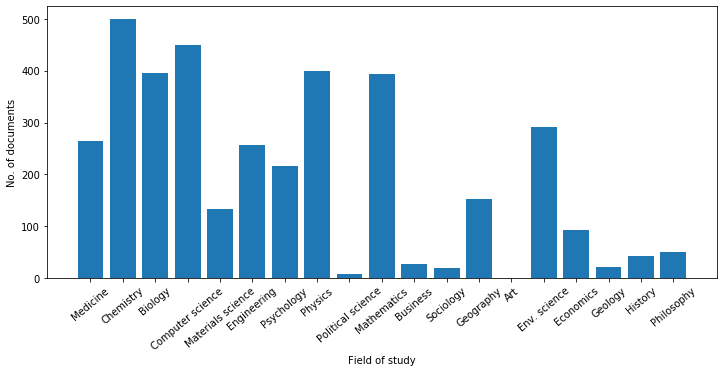

In [34]:
x = list(field_docs.keys())
x[x.index('Environmental science')] = 'Env. science'
plt.figure(figsize=(12,5))
plt.bar(range(len(field_docs)), field_docs.values())
plt.xticks(range(len(field_docs)), x, rotation=40)
plt.xlabel('Field of study')
plt.ylabel('No. of documents')
plt.show()

In [40]:
docs_per_venue = Counter([len(v) for v in all_venues.values()])
print(docs_per_venue.most_common(5))  # most common no. of documents per venue

[(1, 31), (2, 16), (3, 10), (6, 6), (49, 4)]


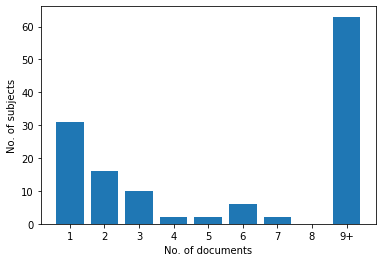

[31, 16, 10, 2, 2, 6, 2, 0, 63]

In [43]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [docs_per_venue[i] for i in range(1, 9)] 
y += [sum(docs_per_venue[i] for i in docs_per_venue if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of documents')
plt.ylabel('No. of subjects')
plt.xticks(range(1, 10), x)
plt.show()
y

In [44]:
docs = {}
for venue in all_venues:
  for doc in all_venues[venue]:
    if doc in docs:
      docs[doc].append(venue)
    else:
      docs[doc] = [venue]
len(docs)  # number of distinct docs in the mapping

3377

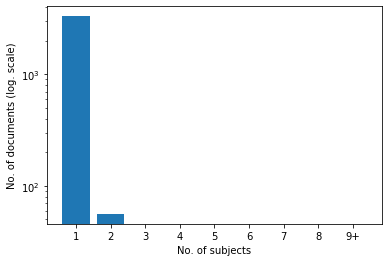

[3321, 56, 0, 0, 0, 0, 0, 0, 0]

In [47]:
venues_per_doc = Counter([len(v) for v in docs.values()])
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [venues_per_doc[i] for i in range(1, 9)] 
y += [sum(venues_per_doc[i] for i in venues_per_doc if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of subjects')
plt.ylabel('No. of documents (log. scale)')
plt.yscale('log')
plt.xticks(range(1, 10), x)
plt.show()
y